In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from sunpy.map import Map
from astropy.coordinates import SkyCoord
from sunpy.physics.differential_rotation import diffrot_map,solar_rotate_coordinate
import sunpy.data.sample

%matplotlib inline

In [3]:
m = Map(sunpy.data.sample.AIA_171_IMAGE)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


In [4]:
lc = u.Quantity([-250,0],'arcsec')
rc = u.Quantity([250,500],'arcsec')

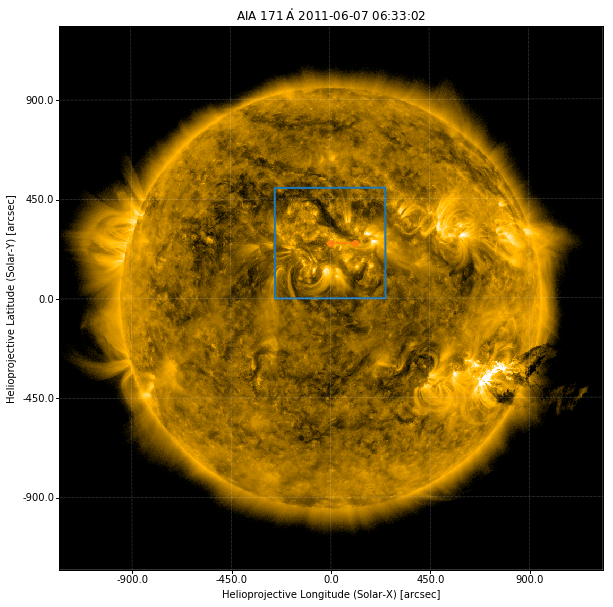

In [59]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection=m)
m.plot(vmin=100,vmax=1e4,axes=ax)
m.draw_rectangle(SkyCoord(*lc,frame=m.coordinate_frame),rc[0]-lc[0],rc[1]-lc[1],color='C0',lw=2)
center = SkyCoord(Tx=lc[0] + (rc[0] - lc[0])/2.,Ty=lc[1] + (rc[1] - lc[1])/2.,frame=m.coordinate_frame)
center_rot = solar_rotate_coordinate(center, m.date + datetime.timedelta(hours=12), rot_type='snodgrass')
ax.plot_coord(SkyCoord([center.Tx,center_rot.Tx],[center.Ty,center_rot.Ty],frame=m.coordinate_frame),'o-',color='C1')

In [60]:
center_rot.Tx - center.Tx

<Angle 111.4237841 arcsec>

In [61]:
center_rot.Ty - center.Ty

<Angle -0.91615551 arcsec>

In [62]:
m_rotate = diffrot_map(m,dt=12*u.hour,rot_type='snodgrass')
#new_meta = m_rotate.meta.copy()
#rot_center = solar_rotate_coordinate(m.center,m_rotate.date,rot_type='snodgrass')
#new_meta['crval1'] = m.reference_coordinate.Tx.value + (m.center.Tx.value - rot_center.Tx.value)
#new_meta['crval2'] = m.reference_coordinate.Ty.value + (m.center.Ty.value - rot_center.Ty.value)
#m_rotate = Map(m_rotate.data, new_meta)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


In [63]:
m_rotate_crop = m_rotate.submap(
    SkyCoord(*lc,frame=m_rotate.coordinate_frame),
    SkyCoord(*rc,frame=m_rotate.coordinate_frame)
)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


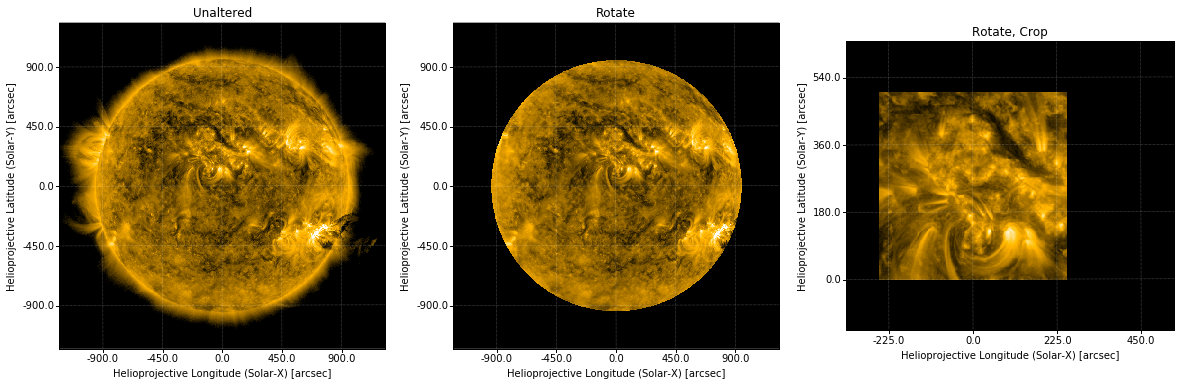

In [64]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(131,projection=m)
m.plot(axes=ax,vmin=100,vmax=1e4,title='Unaltered')
ax = fig.add_subplot(132,projection=m_rotate)
m_rotate.plot(axes=ax,vmin=100,vmax=1e4,title='Rotate')
ax = fig.add_subplot(133,projection=m_rotate_crop)
m_rotate_crop.plot(axes=ax,vmin=100,vmax=1e4,title='Rotate, Crop')
ax.plot_coord(SkyCoord(Tx=-300*u.arcsec,Ty=-100*u.arcsec,frame=m_rotate_crop.coordinate_frame),marker='o',alpha=0.,color='k')
ax.plot_coord(SkyCoord(Tx=500*u.arcsec,Ty=600*u.arcsec,frame=m_rotate_crop.coordinate_frame),marker='o',alpha=0.,color='k')
ax.set_facecolor('k')

In [65]:
m_crop = m.submap(
    SkyCoord(*lc,frame=m.coordinate_frame),
    SkyCoord(*rc,frame=m.coordinate_frame)
)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


In [66]:
m_crop_rotate = diffrot_map(m_crop,dt=12*u.hour,rot_type='snodgrass')
#new_meta = m_crop_rotate.meta.copy()
#rot_center = solar_rotate_coordinate(m_crop.center,m_crop.date+datetime.timedelta(hours=12),rot_type='snodgrass')
#new_meta['crval1'] = m_crop.reference_coordinate.Tx.value + (m_crop.center.Tx.value - rot_center.Tx.value)
#new_meta['crval2'] = m_crop.reference_coordinate.Ty.value + (m_crop.center.Ty.value - rot_center.Ty.value)
#m_crop_rotate = Map(m_crop_rotate.data, new_meta)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


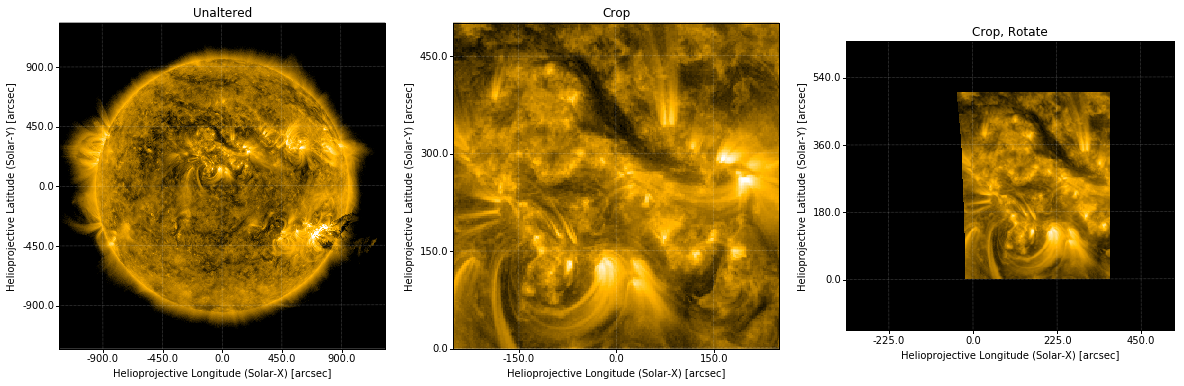

In [67]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(131,projection=m)
m.plot(axes=ax,vmin=100,vmax=1e4,title='Unaltered')
ax = fig.add_subplot(132,projection=m_crop)
m_crop.plot(axes=ax,vmin=100,vmax=1e4,title='Crop')
ax = fig.add_subplot(133,projection=m_crop_rotate)
m_crop_rotate.plot(axes=ax,vmin=100,vmax=1e4,title='Crop, Rotate')
ax.plot_coord(SkyCoord(Tx=-300*u.arcsec,Ty=-100*u.arcsec,frame=m_crop_rotate.coordinate_frame),marker='o',alpha=0.,color='k')
ax.plot_coord(SkyCoord(Tx=500*u.arcsec,Ty=600*u.arcsec,frame=m_crop_rotate.coordinate_frame),marker='o',alpha=0.,color='k')
ax.set_facecolor('k')

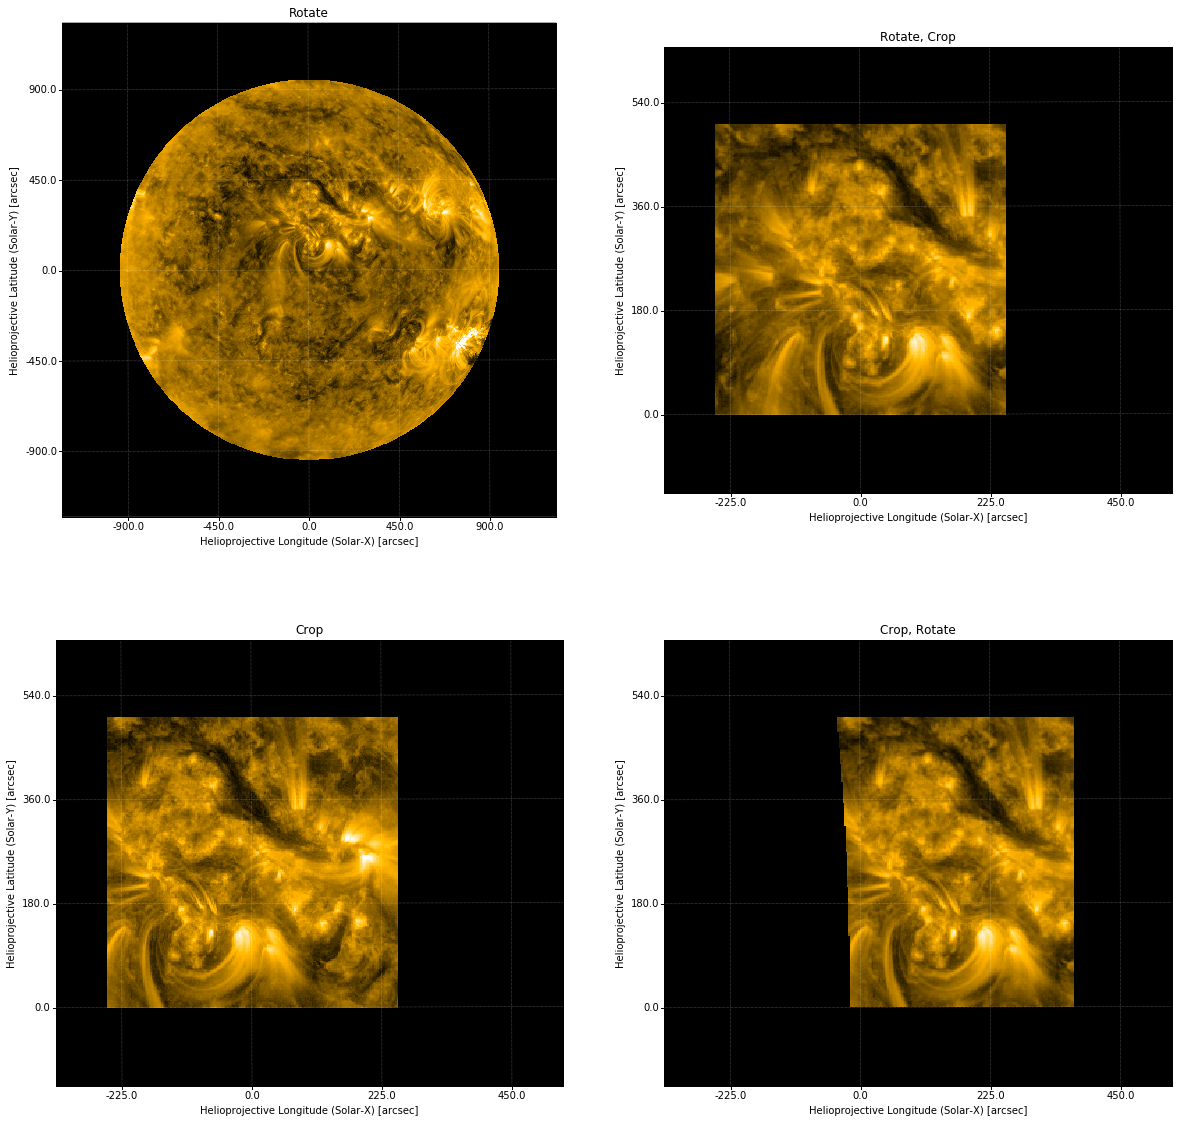

In [68]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221,projection=m_rotate)
m_rotate.plot(axes=ax,vmin=100,vmax=1e4,title='Rotate')
ax = fig.add_subplot(222,projection=m_rotate_crop)
m_rotate_crop.plot(axes=ax,vmin=100,vmax=1e4,title='Rotate, Crop')
ax.plot_coord(SkyCoord(Tx=-300*u.arcsec,Ty=-100*u.arcsec,frame=m_rotate_crop.coordinate_frame),marker='o',alpha=0.,color='k')
ax.plot_coord(SkyCoord(Tx=500*u.arcsec,Ty=600*u.arcsec,frame=m_rotate_crop.coordinate_frame),marker='o',alpha=0.,color='k')
ax.set_facecolor('k')
ax = fig.add_subplot(223,projection=m_crop)
m_crop.plot(axes=ax,vmin=100,vmax=1e4,title='Crop')
ax.plot_coord(SkyCoord(Tx=-300*u.arcsec,Ty=-100*u.arcsec,frame=m_crop.coordinate_frame),marker='o',alpha=0.,color='k')
ax.plot_coord(SkyCoord(Tx=500*u.arcsec,Ty=600*u.arcsec,frame=m_crop.coordinate_frame),marker='o',alpha=0.,color='k')
ax.set_facecolor('k')
ax = fig.add_subplot(224,projection=m_crop_rotate)
m_crop_rotate.plot(axes=ax,vmin=100,vmax=1e4,title='Crop, Rotate')
ax.plot_coord(SkyCoord(Tx=-300*u.arcsec,Ty=-100*u.arcsec,frame=m_crop_rotate.coordinate_frame),marker='o',alpha=0.,color='k')
ax.plot_coord(SkyCoord(Tx=500*u.arcsec,Ty=600*u.arcsec,frame=m_crop_rotate.coordinate_frame),marker='o',alpha=0.,color='k')
ax.set_facecolor('k')

In [57]:
m_crop_rotate.center.Tx - m_rotate_crop.center.Tx

<Angle 231.31353349 arcsec>

In [58]:
m_crop_rotate.center.Ty - m_rotate_crop.center.Ty

<Angle -1.72106308 arcsec>